In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Read in data

df = pd.read_csv(r'C:\Users\brian\OneDrive\Documents\movies.csv')



In [3]:
# Looking at data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# Checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
# Dropping missing data

df = df.dropna()

In [8]:
# Data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [15]:
# Changing data type of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df[''] = df['votes'].astype('int64')

In [18]:
# Order by highest gross

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

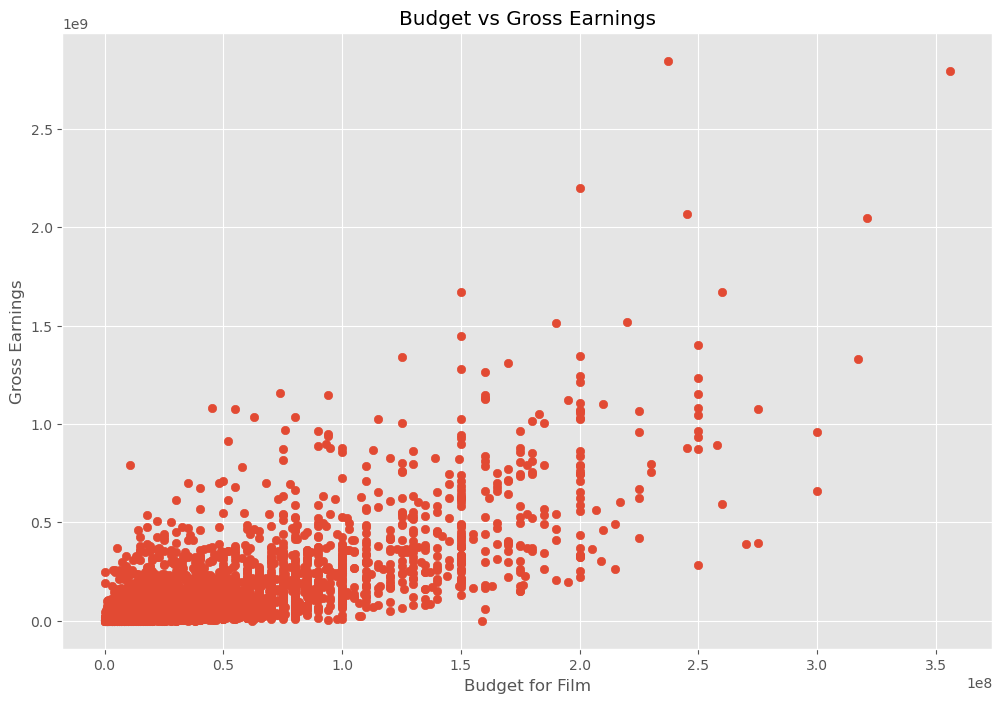

In [20]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Film')

plt.ylabel('Gross Earnings')

plt.show()

In [19]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,1100000
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,903000
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1100000
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,876000
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,897000


<AxesSubplot:xlabel='budget', ylabel='gross'>

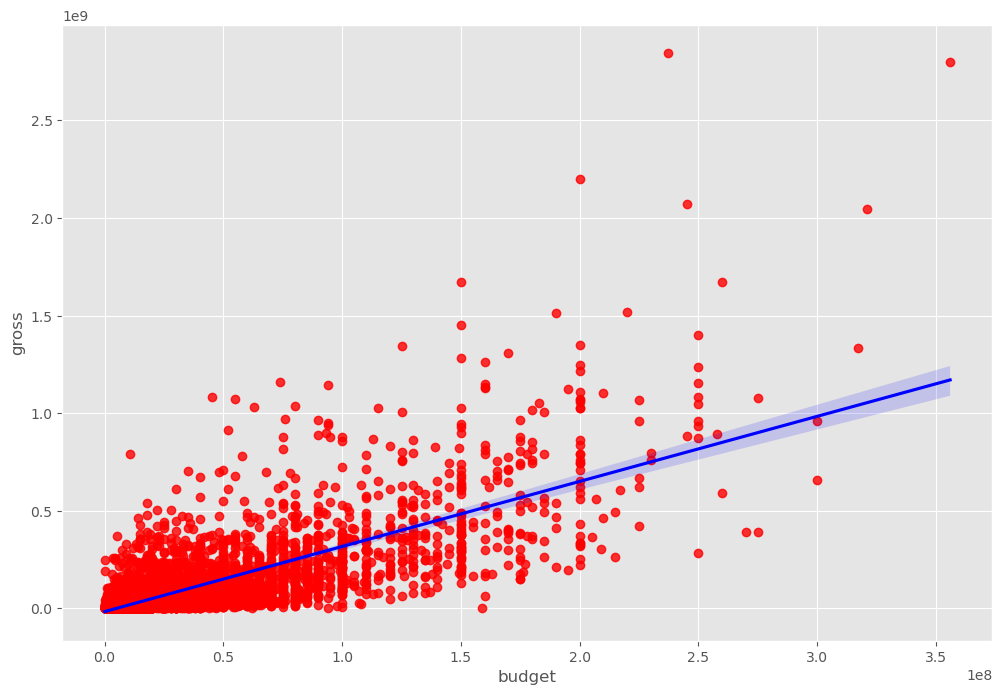

In [22]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

<AxesSubplot:xlabel='score', ylabel='gross'>

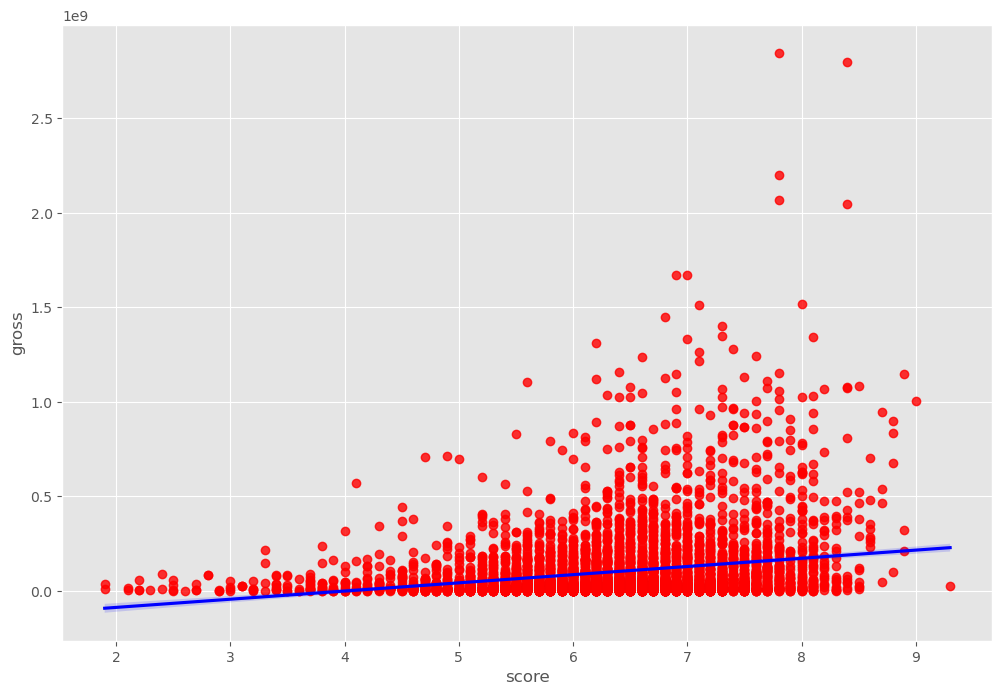

In [35]:
# Score vs Gross

sns.regplot(x="score", y="gross", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

<AxesSubplot:xlabel='budget', ylabel='score'>

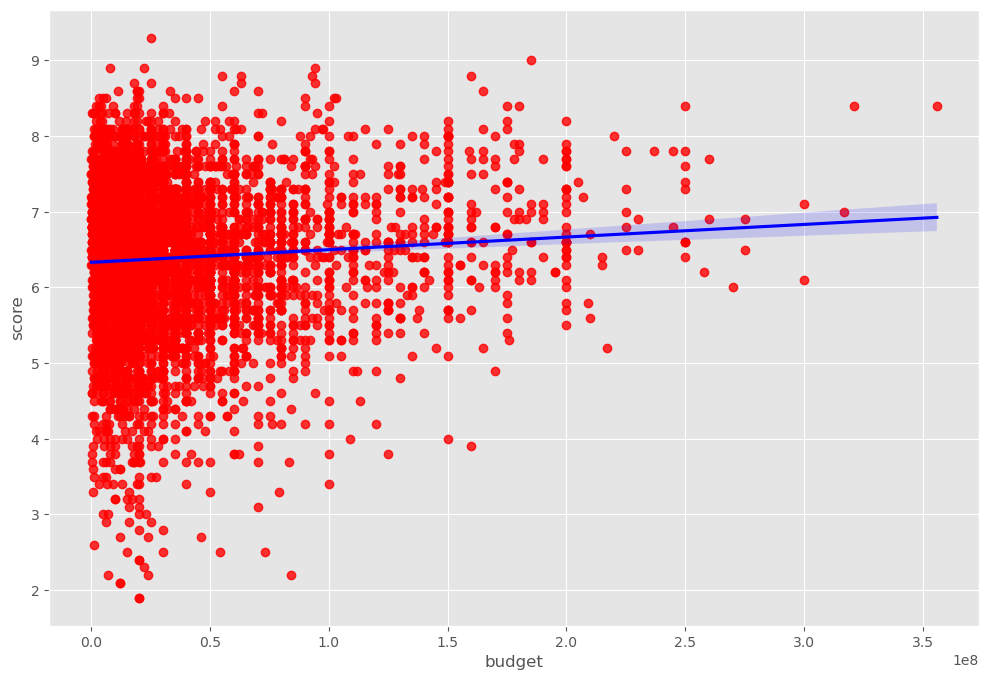

In [36]:
# Budget vs Score

sns.regplot(x="budget", y="score", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [26]:
# Correlation matrix between all numeric columns

df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime,
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.206021
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.474256
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,1.000000
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.439675
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.614751
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.352303
,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,1.000000


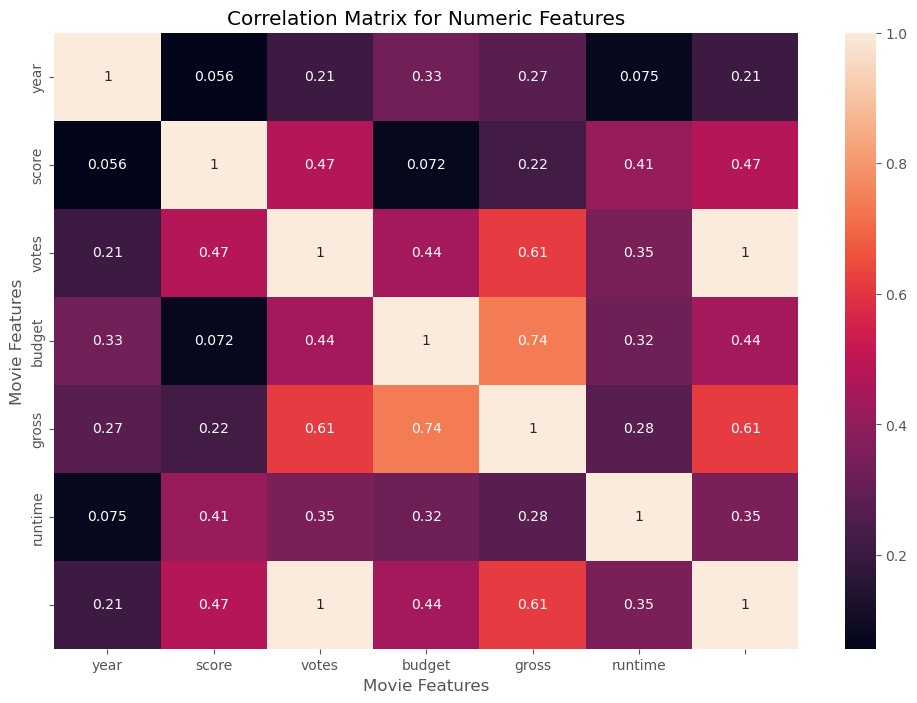

In [28]:
# Visualization of correlation matrix

correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [34]:
# Unstacking correlation matrix

correlation_mat = df.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes    gross      0.614751
gross    votes      0.614751
                    0.614751
         gross      0.614751
budget   gross      0.740247
gross    budget     0.740247
year     year       1.000000
         votes      1.000000
budget   budget     1.000000
gross    gross      1.000000
votes               1.000000
         votes      1.000000
score    score      1.000000
runtime  runtime    1.000000
                    1.000000
dtype: float64

<AxesSubplot:xlabel='gross', ylabel='votes'>

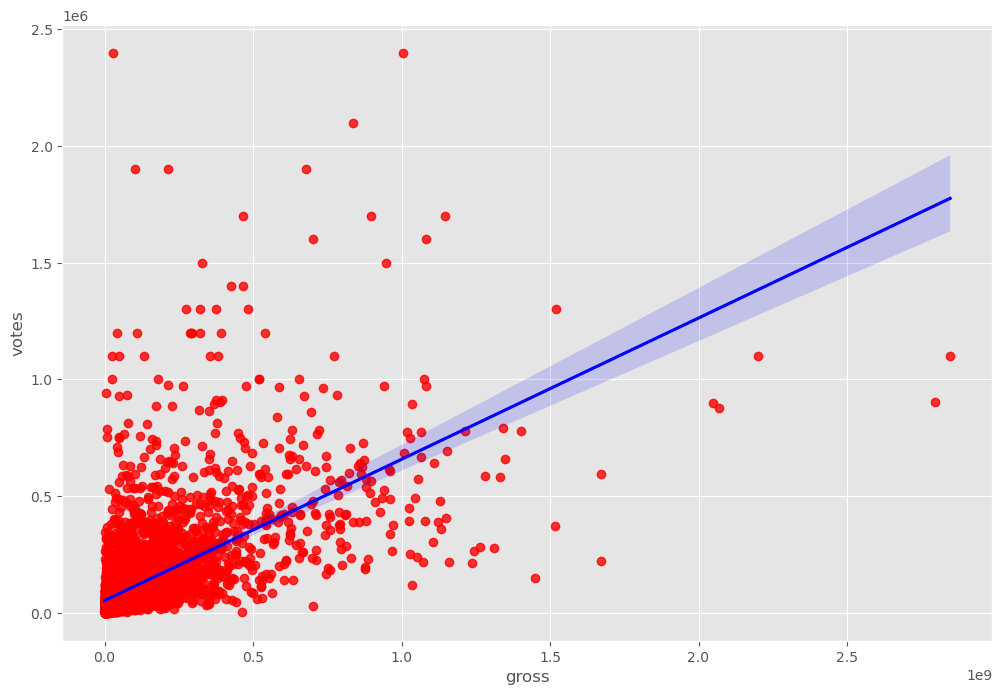

In [37]:
# Plot Gross vs Votes

sns.regplot(x='gross', y='votes', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})